## An Exploration of Chapter 10: Series and Approximations

#### Christopher Taylor

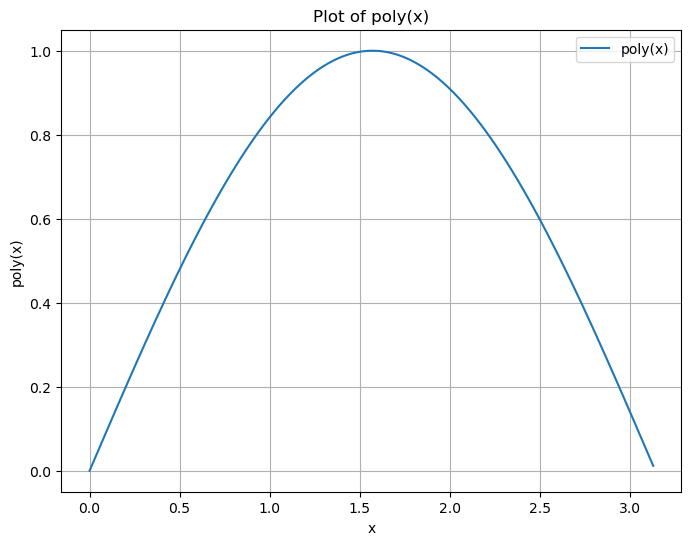

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#defining factorial function
def fact(m):
    p = 1
    for r in range(2, m+1):
        p *= r
    return p


def poly(x, n):
    sum = x
    sign = -1
    for k in range(3, 2*n+1, 2):
        sum += sign * x**k / fact(k)
        sign *= -1
    return sum

# Generate the plot
x_vals = np.arange(0, 3.14, 0.01)
y_vals = [poly(x, 17) for x in x_vals]

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="poly(x)")
plt.title("Plot of poly(x)")
plt.xlabel("x")
plt.ylabel("poly(x)")
plt.grid()
plt.legend()
plt.show()    

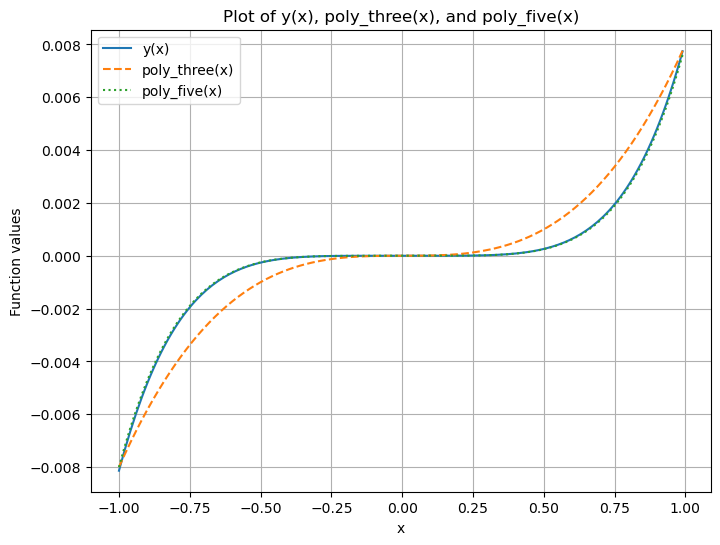

In [2]:
import math

#defining p function
def p(x):
    return x - x**3/6

#defining y function
def y(x):
    return math.sin(x) - p(x)

def poly_three(x):
    return 0.008 * x**3

def poly_five(x):
    return 0.008 * x**5

#generating plot
x_vals = np.arange(-1, 1, 0.01)
y_vals = [y(x) for x in x_vals]
p3_vals = [poly_three(x) for x in x_vals]
p5_vals = [poly_five(x) for x in x_vals]

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="y(x)")
plt.plot(x_vals, p3_vals, label="poly_three(x)", linestyle="--")
plt.plot(x_vals, p5_vals, label="poly_five(x)", linestyle=":")
plt.title("Plot of y(x), poly_three(x), and poly_five(x)")
plt.xlabel("x")
plt.ylabel("Function values")
plt.grid()
plt.legend()
plt.show()    

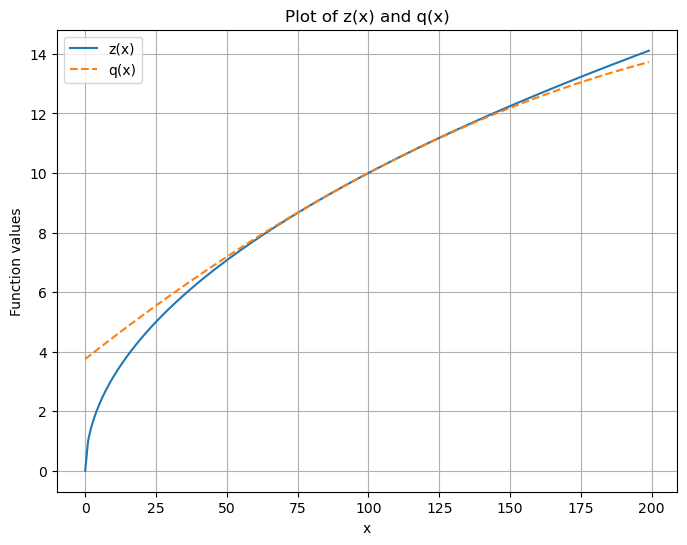

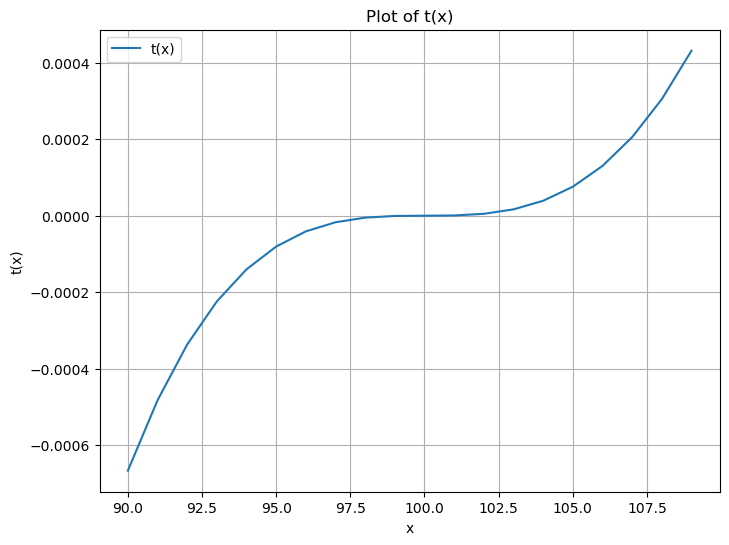

In [3]:
#Taylor polynomials pg 611

def q(x):
    return 10 + ((x-100)/20)-((x-100)**2/8000)

def z(x):
    return math.sqrt(x)

def t(x):
    return z(x) - q(x)

#generating plot
x_vals = np.arange(0, 200, 1)
z_vals = [z(x) for x in x_vals]
q_vals = [q(x) for x in x_vals]

plt.figure(figsize=(8, 6))
plt.plot(x_vals, z_vals, label="z(x)")
plt.plot(x_vals, q_vals, label="q(x)", linestyle="--")
plt.title("Plot of z(x) and q(x)")
plt.xlabel("x")
plt.ylabel("Function values")
plt.grid()
plt.legend()
plt.show()   
             
#generating plot    
x_vals = np.arange(90, 110, 1)
t_vals = [t(x) for x in x_vals]

plt.figure(figsize=(8, 6))
plt.plot(x_vals, t_vals, label="t(x)")
plt.title("Plot of t(x)")
plt.xlabel("x")
plt.ylabel("t(x)")
plt.grid()
plt.legend()
plt.show()   

In [4]:
#Taylor version 1
for x in np.arange(99, 100, 0.1):
    p = t(x) / (x-100)**3
    print(p)

6.289337992626542e-07
6.285379240397789e-07
6.281426039033986e-07
6.277478465776692e-07
6.27353634062249e-07
6.269599879259498e-07
6.265669094672251e-07
6.261743387175659e-07
6.257825369000608e-07
6.253912943056499e-07


In [5]:
ret = 3/8 * 99.5**(-5/2)
print(ret)

3.7972882537088875e-06


In [6]:
def ex2dx(x, n):
    sum = x
    sign = -1
    f = 1 
    for k in range(3, 2*n+2, 2):
        print(sum, k, f)
        sum += sign * x**k / (k * fact(f))
        sign *= -1
        f += 1
    print(sum, k, f)
    return sum


#error function
def erf(t, n):
    e = ex2dx(t, n)
    ans = (2/math.sqrt(math.pi))*e
    return ans

In [7]:
erf(1, 6)

1 3 1
0.6666666666666667 5 2
0.7666666666666667 7 3
0.7428571428571429 9 4
0.7474867724867725 11 5
0.7467291967291968 13 6
0.7468360343360344 13 7


0.8427142223810101

In [8]:
import sympy as sp

def taylor_series(func, var, center, degree):
    """
    Compute and print the Taylor series expansion of a mathematical function.
    
    Parameters:
    - func: The function to expand (sympy expression).
    - var: The variable (sympy symbol).
    - center: The point at which to center the expansion (int or float).
    - degree: The degree of the Taylor polynomial (int).
    
    Returns:
    - None (prints the Taylor series).
    """
    if center == 0 and func.has(sp.sin(var) / var):
        # Special handling for sin(x)/x at x = 0
        taylor_expansion = sp.series(func, var, center, degree + 1).removeO()
    else:
        # General Taylor series
        taylor_expansion = 0
        for n in range(degree + 1):
            nth_derivative = sp.diff(func, var, n)
            nth_derivative_at_center = nth_derivative.subs(var, center)
            term = (nth_derivative_at_center / sp.factorial(n)) * (var - center)**n
            taylor_expansion += term
    
    # Print the Taylor series
    print(f"Taylor series expansion of {func} around {center} to degree {degree}:")
    sp.pprint(taylor_expansion)

In [9]:
x = sp.symbols('x')
a = sp.sin(x) / x  
taylor_series(a, x, center=0, degree=7)

Taylor series expansion of sin(x)/x around 0 to degree 7:
    6      4    2    
   x      x    x     
- ──── + ─── - ── + 1
  5040   120   6     


In [10]:
#1  page 615
def taylor_antiderivative(func, var, center, degree):
    """
    Compute and print the Taylor series expansion of the antiderivative of a given function.
    
    Parameters:
    - func: The function to integrate (sympy expression).
    - var: The variable (sympy symbol).
    - center: The point at which to center the expansion (int or float).
    - degree: The degree of the Taylor polynomial (int).
    
    Returns:
    - None (prints the Taylor series of the antiderivative).
    """
    # Compute the Taylor series for the input function
    taylor_series_func = sp.series(func, var, center, degree + 1).removeO()
    
    # Integrate the Taylor series term by term
    antiderivative_series = sp.integrate(taylor_series_func, var)
    
    print(f"Taylor series expansion of the antiderivative of {func} around {center} to degree {degree}:")
    sp.pprint(antiderivative_series)

In [11]:
#1a
a = sp.sin(x) / x
taylor_antiderivative(a, x, center=0, degree=7)

Taylor series expansion of the antiderivative of sin(x)/x around 0 to degree 7:
     7      5    3    
    x      x    x     
- ───── + ─── - ── + x
  35280   600   18    


In [12]:
#1b
b = sp.E**(x**2)
taylor_antiderivative(b, x, center=0, degree=7)

Taylor series expansion of the antiderivative of exp(x**2) around 0 to degree 7:
 7    5    3    
x    x    x     
── + ── + ── + x
42   10   3     


In [13]:
#1c
c = sp.sin(x**2)
taylor_antiderivative(c, x, center=0, degree=7)

Taylor series expansion of the antiderivative of sin(x**2) around 0 to degree 7:
   7    3
  x    x 
- ── + ──
  42   3 


In [14]:
#2 page 616

def taylor_antiderPLOT(func, var, center, degree1, degree2):
    """
    Compute and plot the Taylor series expansion of the antiderivative of a given function.
    Plots the 7th and 9th degree approximations on the same graph.
    
    Parameters:
    - func: The function to integrate (sympy expression).
    - var: The variable (sympy symbol).
    - center: The point at which to center the expansion (int or float).
    - degree1: The first degree of the Taylor polynomial (int).
    - degree2: The second degree of the Taylor polynomial (int).
    
    Returns:
    - None (prints the Taylor series of the antiderivative and plots it).
    """
    # Compute the Taylor series for the input function up to degree1
    taylor_series_func1 = sp.series(func, var, center, degree1 + 1).removeO()
    # Compute the Taylor series for the input function up to degree2
    taylor_series_func2 = sp.series(func, var, center, degree2 + 1).removeO()
    
    # Integrate the Taylor series term by term
    antiderivative_series1 = sp.integrate(taylor_series_func1, var)
    antiderivative_series2 = sp.integrate(taylor_series_func2, var)
    
    # Print the Taylor series expansion
    print(f"Taylor series expansion of the antiderivative of {func} around {center} to degree {degree1}:")
    sp.pprint(antiderivative_series1)
    
    print(f"Taylor series expansion of the antiderivative of {func} around {center} to degree {degree2}:")
    sp.pprint(antiderivative_series2)
    
    # Convert the symbolic expressions to numerical functions
    numerical_func1 = sp.lambdify(var, antiderivative_series1, "numpy")
    numerical_func2 = sp.lambdify(var, antiderivative_series2, "numpy")
    
    # Generate x values (over the interval [0, 5])
    x_vals = np.linspace(0, 5, 400)
    y_vals1 = numerical_func1(x_vals)  # Evaluate the 7th degree polynomial
    y_vals2 = numerical_func2(x_vals)  # Evaluate the 9th degree polynomial
    
    # Plotting both polynomials
    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals1, label=f"Degree {degree1} Taylor Series", color='blue', linestyle='-', linewidth=2)
    plt.plot(x_vals, y_vals2, label=f"Degree {degree2} Taylor Series", color='red', linestyle='--', linewidth=2)
    plt.axhline(0, color='black', linewidth=0.5)  # Add x-axis
    plt.axvline(0, color='black', linewidth=0.5)  # Add y-axis
    plt.title(f"Taylor Series Expansion of Antiderivative")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

Taylor series expansion of the antiderivative of sin(x)/x around 0 to degree 7:
     7      5    3    
    x      x    x     
- ───── + ─── - ── + x
  35280   600   18    
Taylor series expansion of the antiderivative of sin(x)/x around 0 to degree 9:
    9        7      5    3    
   x        x      x    x     
─────── - ───── + ─── - ── + x
3265920   35280   600   18    


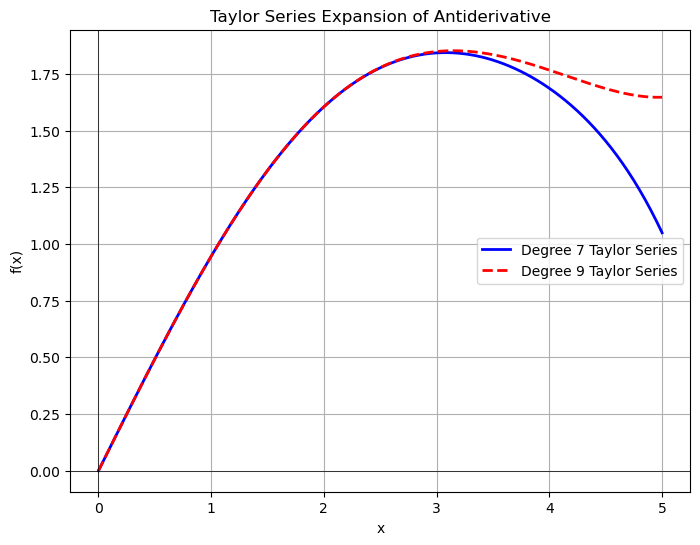

In [15]:
taylor_antiderPLOT(a, x, center=0, degree1=7, degree2=9)

Question 2 contd.
They don't begin to differ visibly until around x=3

In [16]:
#3 page 616
ex2dx(0.3, 3)
ex2dx(0.3, 4)

0.3 3 1
0.291 5 2
0.291243 7 3
0.29123779285714285 7 4
0.3 3 1
0.291 5 2
0.291243 7 3
0.29123779285714285 9 4
0.29123788398214284 9 5


0.29123788398214284

In [17]:
ex2dx(-1, 3)
ex2dx(-1, 4)

-1 3 1
-0.6666666666666667 5 2
-0.7666666666666667 7 3
-0.7428571428571429 7 4
-1 3 1
-0.6666666666666667 5 2
-0.7666666666666667 7 3
-0.7428571428571429 9 4
-0.7474867724867725 9 5


-0.7474867724867725

for E(0.3), the 7th and 9th degree are the same out to 5 digit, but for E(-1), they are only the same out to 2 digits

In [18]:
#Testing for curiosity's sake
ex2dx(-1, 6)
ex2dx(-1, 12)

-1 3 1
-0.6666666666666667 5 2
-0.7666666666666667 7 3
-0.7428571428571429 9 4
-0.7474867724867725 11 5
-0.7467291967291968 13 6
-0.7468360343360344 13 7
-1 3 1
-0.6666666666666667 5 2
-0.7666666666666667 7 3
-0.7428571428571429 9 4
-0.7474867724867725 11 5
-0.7467291967291968 13 6
-0.7468360343360344 15 7
-0.7468228068228069 17 8
-0.746824265739707 19 9
-0.7468241207011848 21 10
-0.7468241338237177 23 11
-0.7468241327344955 25 12
-0.7468241328180025 25 13


-0.7468241328180025

for E(-1), it takes out to around 24th or 25th degree polynomial before it stabilizes with 5 digits, compared to E(0.3) stabilizing with only 7-9 degrees.

In [19]:
#4 page 616
l = 0.4
v = math.pi / 12
ansl = l - l**3 / math.factorial(3) + l**5 / math.factorial(5) - l**7 / math.factorial(7)
ansv = v - v**3 / math.factorial(3) + v**5 / math.factorial(5) - v**7 / math.factorial(7)
print(ansl, ansv)

0.3894183415873016 0.2588190450866102


In [20]:
#5 page 616
x = sp.symbols('x')
g = x**3 - 3*x
taylor_antiderivative(g, x, center=0, degree=3)

Taylor series expansion of the antiderivative of x**3 - 3*x around 0 to degree 3:
 4      2
x    3⋅x 
── - ────
4     2  


In [21]:
#6 page 616
a = sp.sin(x)
b = sp.cos(x)
c = sp.sin(3*x)
taylor_antiderivative(a, x, center=math.pi, degree=7)
taylor_antiderivative(b, x, center=math.pi, degree=7)
taylor_antiderivative(c, x, center=math.pi, degree=7)

Taylor series expansion of the antiderivative of sin(x) around 3.141592653589793 to degree 7:
0
Taylor series expansion of the antiderivative of cos(x) around 3.141592653589793 to degree 7:
0
Taylor series expansion of the antiderivative of sin(3*x) around 3.141592653589793 to degree 7:
0


#6 page 616

a) sin(x - $\pi) = -(x - \pi) + \frac{(x - \pi)^{3}}{3!} - \frac{(x - \pi)^{5}}{5!} + \frac{(x - \pi)^{7}}{7!}$

b) cos(x - $\pi) = -1 + \frac{(x - \pi)^{2}}{2!} - \frac{(x - \pi)^{4}}{4!} + \frac{(x - \pi)^{6}}{6!}$

c) sin(3$\pi) = \frac{-3}{1!}(x-\pi) + \frac{27}{3!}x-\pi)^{3} - \frac{243}{5!}(x-\pi)^{5} + \frac{2187}{7!}(x-\pi)^{7}$

In [22]:
#7a
taylor_antiderivative(math.sin(3), x, center=0, degree=7)

Taylor series expansion of the antiderivative of 0.1411200080598672 around 0 to degree 7:
0.141120008059867⋅x


$sin(x) = x - \frac{x^{3}}{3!} + \frac{x^{5}}{5!} - \frac{x^{7}}{7!}$

$sin(3) = 3 - \frac{3^{3}}{3!} + \frac{3^{5}}{5!} - \frac{3^{7}}{7!}$

$sin(3) = 3 - \frac{27}{6} + \frac{243}{120} - \frac{2187}{5040}$

$sin(3) = 3 - 4.5 + 2.025 - 0.4339$

$sin(3) = 0.0911$

Comparing my answer to the code's answer, only 1 digit is fixed, the zero before the decimal point.

In [23]:
#7b
taylor_antiderivative(math.sin(3), x, center=math.pi, degree=7)

Taylor series expansion of the antiderivative of 0.1411200080598672 around 3.141592653589793 to degree 7:
0.141120008059867⋅x


$sin(x-\pi) = x-\pi - \frac{(x-\pi)^{3}}{3!} + \frac{(x-\pi)^{5}}{5!} - \frac{(x-\pi)^{7}}{7!}$

$sin(3-\pi) = 3-\pi - \frac{(3-\pi)^{3}}{3!} + \frac{(3-\pi)^{5}}{5!} - \frac{(3-\pi)^{7}}{7!}$

$sin(3) = 3-\pi - \frac{-2.8e^{-3}}{6} + \frac{-5.6e^{-5}}{120} - \frac{-1.14e^{-6}}{5040}$

$sin(3) = -0.14159 - (-4.7^e{-4}) + (-4.7e^{-7}) - (-2.26e^{-10}$

$sin(3) = -0.141120469$

Comparing my answer to the code's answer, up to 5 (maybe even 6) digits are accurate. 

In [24]:
#8
def taylor_sin(x, degree):
    """
    Evaluates the Taylor series for sin(x) centered at 0 up to the specified degree.
    
    Parameters:
    - x (float): The angle in radians.
    - degree (int): The maximum degree of the Taylor polynomial.
    
    Returns:
    - float: Approximation of sin(x).
    """
    # Initialize variables
    result = 0
    sign = 1  # Alternating signs for sin(x) series
    
    # Iterate through odd powers (1, 3, 5, ...)
    for n in range(0, degree + 1):
        term = sign * (x ** (2 * n + 1)) / math.factorial(2 * n + 1)
        result += term
        sign *= -1  # Alternate the sign
    
    return result


# Main program
if __name__ == "__main__":
    # Convert angles to radians
    angles_deg = list(range(5, 46, 5))  # 5°, 10°, ..., 45°
    angles_rad = [math.radians(angle) for angle in angles_deg]

    # Define Taylor series degree
    degree = 7

    # Print results
    print(f"{'Angle (°)':<10} {'sin(x)':<15}")
    print("-" * 25)
    for angle, radian in zip(angles_deg, angles_rad):
        approx = taylor_sin(radian, degree)
        print(f"{angle:<10} {approx:<15.7f}")

Angle (°)  sin(x)         
-------------------------
5          0.0871557      
10         0.1736482      
15         0.2588190      
20         0.3420201      
25         0.4226183      
30         0.5000000      
35         0.5735764      
40         0.6427876      
45         0.7071068      


#9

a) if m = 3 and n = 0, then $2^{m} + 2^{n} = 2^{3} + 2^{0} = 2^{3+0} = 2^{3}$. which is the same as $2^{3} \cdot 1$

b) if m = -3 and n = 4, then $2^{m} + 2^{n} = 2^{-3} + 2^{4} = 2^{-3+4} = 2^{1} = 2$

if $2^{-3} = \frac{1}{2}^{3}$ and we have $2^{m} + 2^{n} = \frac{1}{2}^{3} \cdot 2^{4} = \frac{1}{8} \cdot 16 = 2$

c) given $2^{1/4} = \sqrt[4]{2}$, we can raise both by the power of 4 to show equality: 
- for $2^{1/4}$:  $(2^{1/4})^{4} = 2^{1/4 \cdot 4} = 2^{1} = 2$
- for $\sqrt[4]{2}$:  $(\sqrt[4]{2})^{4} = 2$

d) factorial means you multiply every number from n down, counting by 1, so 4! = 4 * 3 * 2 * 1, so putting n+1 on there, just means you start one more number up, so n+1 = 5, do 5!, looking at what 4! is, we can see that 5! = 5 * 4!. if n = 0, then we have n! = 0! = 1. so n+1 * 0! = 1 * 1 = 1. if 0! were 0, then n+1 * 0! would equal 0 instead of 1. 

e) (-1)! can't keep the n+1 * n! property because n+1 = 0 and 0 * anything = 0


In [25]:
#10
f = (1+x)**(1/2)
taylor_antiderivative(f, x, center=0, degree=5)

Taylor series expansion of the antiderivative of (x + 1)**0.5 around 0 to degree 5:
                     6              5             4                       3   
0.00455729166666667⋅x  - 0.0078125⋅x  + 0.015625⋅x  - 0.0416666666666667⋅x  + 

      2        
0.25⋅x  + 1.0⋅x


After doing 10 problems on Taylor Polynomials, I'm moving on to Taylor Series.

Section 10.3 Exercises page 625:

In [26]:
#1a page 625

def find_n_for_a(a):
    """
    Finds the smallest n such that a^n / n! < 1 using logarithms.
    
    Parameters:
    - a: The base of the power, provided by the user.
    
    Returns:
    - n: The smallest integer such that a^n / n! < 1.
    """
    n = 1
    log_a = math.log10(a)  # Compute log10(a) once
    
    while True:
        # Use Stirling's approximation for log10(n!)
        if n > 1:
            log_factorial = n * math.log10(n) - n / math.log(10)
        else:
            log_factorial = 0  # log10(1!) = log10(1) = 0
        
        # Calculate log10(a^n / n!)
        log_term = n * log_a - log_factorial
        
        # If the term becomes less than 1, its log10 is negative
        if log_term < 0:
            break
        
        n += 1

    return n

# Example usage:
a = float(input("Enter a value for a: "))
n = find_n_for_a(a)
print(f"The smallest n such that {a}^n / n! < 1 is n = {n}")

Enter a value for a:  100


The smallest n such that 100.0^n / n! < 1 is n = 272


**1b page 625** 
- sin(100) = sin(100 - 360) = sin(-260)
- sin(-260) = -sin(260) = -sin(260 - 180) = -sin(80)
- sin(100) = -sin(80)

Taylor series for sin(x): $sin(x) = x - \frac{x^{3}}{3!} + \frac{x^{5}}{5!} - \frac{x^{7}}{7!}$
- converting $80^{o}$ to radians: $80 = 80 \cdot \frac{\pi}{180} = \frac{4\pi}{9}$ radians

Substituting $\frac{4\pi}{9}$ into the Taylor series for sin(x):
- $sin(\frac{4\pi}{9}) = \frac{4\pi}{9} - \frac{(\frac{4\pi}{9})^{3}}{6} + \frac{(\frac{4\pi}{9})^{5}}{120} - \frac{(\frac{4\pi}{9})^{7}}{5040}$
- $sin(\frac{4\pi}{9}) \approx 1.3963 - \frac{(1.3963)^{3}}{6} + \frac{(1.3963)^{5}}{120} - \frac{(1.3963)^{7}}{5040}$
- $sin(\frac{4\pi}{9}) \approx 1.3963 - \frac{2.724}{6} + \frac{5.283}{120} - \frac{11.015}{5040}$
- $sin(\frac{4\pi}{9}) \approx 1.3963 - 0.454 + 0.044 - 0.0022$
- $sin(\frac{4\pi}{9}) \approx 0.9841$

So $sin(100^{o}) \approx -0.9841$


**1c page 626**

Both sine and cosine are periodic functions with period of 2$\pi$. 
- sin(x) = sin(x + 2k$\pi$) for any integer k
- cos(x) = cos(x + 2k$\pi$) for any integer k

So we can reduce x to an equivalent value within range 0 $\leq x \leq 2\pi$ 

Using symmetry properties, we can further reduce x to the range 0 $\leq x \leq \frac{\pi}{2}$ :
- sin(x) = sin($\pi - x$)
- sin(x) = sin(x - 2$\pi$)
- cos(x) = sin($\frac{\pi}{2} - x)$
- cos(x) = cos(x - 2$\pi$)

Example: calculate sin($100^{o}$)
1. convert $100^{o}$ to radians:  100 $\cdot \frac{\pi}{180} \approx$ 1.745 radians
2. reduce angle to between 0 and $\frac{\pi}{4}:  sin(180^{o} - 100^{o}) = sin(80^{o}$
3. convert $80^{o}$ to radians:  80 $\cdot \frac{\pi}{180} \approx$ 1.396 radians
4. use Taylor series for sin(x) to approximate sin(1.396):
- $sin(x) = x - \frac{x^{3}}{3!} + \frac{x^{5}}{5!} - \frac{x^{7}}{7!}$
- $sin(1.396) \approx 1.396 - \frac{(1.396)^{3}}{6} + \frac{(1.396)^{5}}{120} - \frac{(1.396)^{7}}{5040}$
- $sin(1.396) \approx 1.396 - 0.454 + 0.044 - 0.0022$
- $sin(1.396) \approx 0.984$

Example: calculate cos($100^{o}$)
- since sin(x) = cos($\frac{\pi}{2} - x)$, we can compute sin($100^{o}$) by calculating cos($10^{o}$). 10 = 90 - 100
1. convert $10^{o}$ to radians:  10 $\cdot \frac{\pi}{180} \approx$ 0.1745 radians
2. use Taylor series for cos(x) to approximate cos(0.1745):
- $cos(x) = 1 - \frac{x^{2}}{2!} + \frac{x^{4}}{4!} - \frac{x^{6}}{6!}$
- $cos(0.1745) \approx 1 - \frac{(0.1745)^{2}}{2} + \frac{(0.1745)^{24}}{4!} - \frac{(0.1745)^{6}}{720}$
- $cos(0.1745) \approx 1 - 0.0152 + 0.0004 - 3.9e^{-8}$
- $cos(0.1745) \approx 0.985$

Answers for sin(x) and cos(x) end up being practically the same.

**2a page 626**

Taylor series centered at x = 0 for ln(1-x):  -(x + $\frac{x^{2}}{2} + \frac{x^{3}}{3} + \frac{x^{4}}{4} + \frac{x^{5}}{5}$)
- if x = -4: 
$ln(1-(-4)) = -(-4 + \frac{(-4)^{2}}{2} + \frac{(-4)^{3}}{3} + \frac{(-4)^{4}}{4} + \frac{(-4)^{5}}{5}$)
$ln(5) = 4 - \frac{16}{2} + \frac{64}{3} - \frac{256}{4} + \frac{1024}{5}$)

It's easy to quickly see how the numbers continue to get larger and larger (16/2, 64/3, 256/4, etc.) For any |x| >= 1, the series diverges, so only |x| < 1 have a converging series.
- if x = -0.5:
$ln(1-(-0.5)) = -(-0.5 + \frac{(-0.5)^{2}}{2} + \frac{(-0.5)^{3}}{3} + \frac{(-0.5)^{4}}{4} + \frac{(-0.5)^{5}}{5}$)
$ln(1.5) = 0.5 - \frac{0.25}{2} + \frac{0.125}{3} - \frac{0.0625}{4} + \frac{0.03125}{5}$
Here it's easy to quickly see how the numbers converge, getting smaller and smaller as the series continues. The closer |x| is to 1 (while still being less than 1), the more terms are needed for accuracy. Since the series diverges when |x| >= 1, the interval of convergence is [-1, 1]. 

**2b page 626**

Here we are using the logarithmic identity:  $ln(\frac{1}{A}) = -ln(A),  A > 0$
- we can rewrite ln(x) for x > 2 as: $ln(x)= -ln(\frac{1}{x})$

for x = 5:
- ln(5) = -ln($\frac{1}{5}$)

Since $ln(1-x)$ has a Taylor expansion that converges for |x| < 1, we rewrite $\frac{1}{5}$ as follows: $\frac{1}{5} = 1 - 0.8$, x = 0.8

So now $ln(5) = -ln(1-0.8)$ and we can use the Taylor series for ln(1-u):
- $ln(1 - x) = -(x + \frac{x^{2}}{2} + \frac{x^{3}}{3} + \frac{x^{4}}{4} + \frac{x^{5}}{5} + \frac{x^{6}}{6} + \frac{x^{7}}{7}$)
- $ln(5) = (0.8 + \frac{(0.8)^{2}}{2} + \frac{(0.8)^{3}}{3} + \frac{(0.8)^{4}}{4} + \frac{(0.8)^{5}}{5} + \frac{(0.8)^{6}}{6} + \frac{(0.8)^{7}}{7}$)
- $ln(5) = 0.8 + \frac{0.64}{2} + \frac{0.512}{3} + \frac{4096}{4} + \frac{32768}{5} + \frac{0.262144}{6} + \frac{0.2097152}{7}$)
- $ln(5) = 0.8 + 0.32 + 0.1707 + 0.1024 + 0.06554 + 0.04369 + 0.02996$)
- $ln(5) \approx 1.609437$

It took going out to 7 degrees to get 7 digits in the answer.


**2c page 626**

We know that values of x closer to 0 converge faster and we are comparing x = -1/2 and x = 1/3. The method with x = 1/3 would be faster.

**3 page 626**

a)
Taylor series centered at x = 0 for ln(1+x):
- $ln(1 + x) = x - \frac{x^{2}}{2} + \frac{x^{3}}{3} - \frac{x^{4}}{4} + \frac{x^{5}}{5} - \frac{x^{6}}{6} + \frac{x^{7}}{7}$)

b) Taylor series centered at x = 0 for $ln(\frac{1-x}{1+x}) = ln(1-x) - ln(1+x)$:
- $ln(1 - x) = -x - \frac{x^{2}}{2} - \frac{x^{3}}{3} - \frac{x^{4}}{4} - \frac{x^{5}}{5} - \frac{x^{6}}{6} - \frac{x^{7}}{7}$)
- $ln(1 + x) = x - \frac{x^{2}}{2} + \frac{x^{3}}{3} - \frac{x^{4}}{4} + \frac{x^{5}}{5} - \frac{x^{6}}{6} + \frac{x^{7}}{7}$)

Now we have to subtract them:
- $ln(\frac{1-x}{1+x}) = -2x - \frac{2x^{3}}{3} - \frac{2x^{5}}{5} - \frac{2x^{7}}{7}$

**3c page 626**

Here we have to show that for any x > 0, there exists a value u with -1 < u < 1 such that:
$x = \frac{1-u}{1+u}$

1. Solve for u:
- x(1+u) = 1-u
- x + xu = 1-u
- u(x+1) = 1-x
- u = $\frac{1-x}{x+1}$

2. check range of u:
- if x > 0, 1-x > -$\infty$ and 1-x < 1 and x+1 > 1
- for x > 0, -1 < u = $\frac{1-x}{x+1}$ < 1

3. verification: substitute u = $\frac{1-x}{x+1}$ back into expression for x: x = $\frac{1-u}{1+u}$
- numerator:  1-u = 1 - $\frac{1-x}{x+1} = \frac{(x+1)-(1-x)}{x+1} = \frac{2x}{x+1}$
- denominator:  1+u = 1 + $\frac{1-x}{x+1} = \frac{(x+1)+(1-x)}{x+1} = \frac{2}{x+1}$
- combine: $\frac{1-u}{1+u} = \frac{\frac{2x}{x+1}}{\frac{2}{x+1}} = x$

**3d page 626**

To evaluate ln(5) to 7 decimal places using Taylor series:
1. Represent ln(5) in terms of ln($\frac{1-u}{1+u}$:
- x = $\frac{1-u}{1+u}$
- set x = 5 and solve for u:  u = $\frac{1-x}{x+1} = \frac{1-5}{5+1} = \frac{-4}{6} = -\frac{2}{3}$
- so ln(5) = ln$\frac{1-u}{1+u}$ where u = -$\frac{2}{3}$

2. Use Taylor series for ln$\frac{1-u}{1+u}$:
- ln$\frac{1-u}{1+u}$ = -2$\sum_{n=1}^\infty \frac{u^{2n-1}}{2n-1}$
- substitute u = -$\frac{2}{3}$: ln5 = -2$\sum_{n=1}^\infty \frac{\frac{-2}{3}^{2n-1}}{2n-1}$
- simplify:  ln5 = -2$\sum_{n=1}^\infty \frac{-1^{2n-1} \cdot \frac{-2}{3}^{2n-1}}{2n-1}$
- simplify:  ln5 = 2$\sum_{n=1}^\infty \frac{\frac{2}{3}^{2n-1}}{2n-1}$

3. Approximate ln5 using first few terms of truncated series:
- ln5 = 2($\frac{2}{3} + \frac{\frac{2}{3}^{3}}{3} + \frac{\frac{2}{3}^{5}}{5} + \frac{\frac{2}{3}^{7}}{7}$ + ...)
- ln5 = 2($\frac{2}{3} + \frac{8}{81} + \frac{32}{1215} + \frac{128}{15309}$ + ...)

This math started to get into very small decimals, so I switched to doing it via code:

In [27]:
u = -2/3
target_precision = 1e-8  # Corresponds to 7 decimal places
taylor_sum = 0
n = 1

while True:
    term = (2 * (u**(2*n - 1))) / (2*n - 1)
    taylor_sum += term
    n += 1
    if abs(term) < target_precision:  # Stop when the term is smaller than the target precision
        break

print(f"ln(5) ≈ {taylor_sum:.7f}")
print(f"Number of terms used: {n - 1}")

ln(5) ≈ -1.6094379
Number of terms used: 20


**4a page 626**

Taylor series for arctan(x) = $\sum_{n=0}^\infty (-1)^{n}\frac{x^{2n+1}}{2n+1}$
1. Substitute x = 0.5:
- arctan(0.5) = $\sum_{n=0}^\infty (-1)^{n}\frac{0.5^{2n+1}}{2n+1}$
- series becomes: 0.5 - $\frac{0.5^{3}}{3} + \frac{0.5^{5}}{5} - \frac{0.5^{7}}{7} + \frac{0.5^{9}}{9}$ + ...
- arctan(0.5) = 0.5 - $\frac{0.125}{3} + \frac{0.03125}{5} - \frac{0.0078125}{7} + \frac{0.001953125}{9}$ + ...
- arctan(0.5) $\approx$ 0.5 - 0.0416667 + 0.00625 - 0.0011161 + 0.000217
- arctan(0.5) $\approx$ 0.4636476


**4b page 627**

Taylor series for arctan(x) = $\sum_{n=0}^\infty (-1)^{n}\frac{x^{2n+1}}{2n+1}$
1. Substitute x = 2:
- arctan(2) = $\sum_{n=0}^\infty (-1)^{n}\frac{2^{2n+1}}{2n+1}$
- series becomes: 2 - $\frac{2^{3}}{3} + \frac{2^{5}}{5} - \frac{2^{7}}{7} + \frac{2^{9}}{9}$ + ...
- arctan(2) = 2 - $\frac{8}{3} + \frac{32}{5} - \frac{128}{7} + \frac{512}{9}$ + ...
- arctan(2) $\approx$ 2 - 2.667 + 6.4 - 18.286 + 56.889 + ...

the Taylor series for arctan(x) is centered at x=0 and only converges for |x| <= 1. for |x| > 1, the series diverges.

To calculate arctan(2), we have to reduce 2 to a smaller number using the addition formula for tangent:
- arctan(a) + arctan(b) = arctan($\frac{a+b}{1-ab})$, if ab < 1
- if we choose a = 1 and b = 1, arctan(1) + arctan(1) = arctan(2), so arctan(2) = 2 $\cdot$ arctan(1)
- arctan(1) = $\frac{\pi}{4}$, so arctan(2) = 2 $\cdot \frac{\pi}{4} = \frac{\pi}{2}$

We can also use the relationship between arctan(x) and arctan($\frac{1}{x}$):
- for x > 1, we can use arctan(x) = $\frac{\pi}{2}$ - arctan($\frac{1}{x}$)
- so for x = 2, arctan(2) = $\frac{\pi}{2}$ - arctan($\frac{1}{2}$)

Now we can evaluate arctan(0.5) with Taylor series to approximate and subtract our approximation from $\frac{\pi}{2}$:
- arctan(2) = $\frac{\pi}{2}$ - 0.4636476


**5a page 627**

We know arctan(1) = $\frac{\pi}{4}$, therefore $\pi = 4 \cdot arctan(1)$
1. Expanding Taylor series for arctan(1):
- 1 - $\frac{1^{3}}{3} + \frac{1^{5}}{5} - \frac{1^{7}}{7} + \frac{1^{9}}{9}$ + ...
- 1 - $\frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9}$ + ...

2. substituting series in for arctan(1):
- $\pi = 4 \cdot (1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9}$ + ...)
- $\pi = 4 (1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9}$ + ...)

I continued to calculate the series out up to 1/21 and hadn't got it to stabilize out to 3 or 4 digits past decimal, so I switched to using code:

In [28]:
def calculate_pi():
    pi_estimate = 0
    n = 0
    previous_estimate = 0
    while True:
        # Taylor series term for arctan(1): (-1)^n / (2n + 1)
        term = (-1) ** n / (2 * n + 1)
        pi_estimate += term
        
        # Multiply by 4 to get pi
        pi_value = pi_estimate * 4
        
        # Check if the value of pi has stabilized to 3 decimal places
        if round(pi_value, 3) == round(previous_estimate, 3):
            break
        
        previous_estimate = pi_value
        n += 1
    
    return pi_value

# Call the function and print the result
pi_value = calculate_pi()
print(f"Calculated value of pi: {pi_value:.4f}")

Calculated value of pi: 3.1415


**5b page 627**

Addition formula for tangent function: $tan(\alpha + \beta) = \frac{tan(\alpha) + tan(\beta)}{1 - tan(\alpha)tan(\beta)}$

To use the addition formula for evaluating $\pi$, we express $\frac{\pi}{4}$ as sum of 3 arctangents:
- $\frac{\pi}{4}$ = arctan($\frac{1}{2}$) + arctan($\frac{1}{5}$) + arctan($\frac{1}{8}$)
1. Start by adding the first 2 arctangents:
- tan(arctan($\frac{1}{2}$) + arctan($\frac{1}{5}$)) = $\frac{\frac{1}{2} + \frac{1}{5}}{1 - \frac{1}{2} \cdot \frac{1}{5}}$
- $\frac{\frac{1}{2} + \frac{1}{5}}{1 - \frac{1}{2} \cdot \frac{1}{5}}$ = $\frac{\frac{7}{10}}{1 - \frac{1}{10}} = \frac{\frac{7}{10}}{\frac{9}{10}} = \frac{7}{9}$
2. Now add that sum (arctan($\frac{7}{9}$)) to arctan($\frac{1}{8}$)
- tan(arctan($\frac{7}{9}$) + arctan($\frac{1}{8}$)) = $\frac{\frac{7}{9} + \frac{1}{8}}{1 - \frac{7}{9} \cdot \frac{1}{8}}$
- $\frac{\frac{7}{9} + \frac{1}{8}}{1 - \frac{7}{9} \cdot \frac{1}{8}}$ = $\frac{\frac{56}{72} + \frac{9}{72}}{1 - \frac{7}{72}}$ = $\frac{\frac{65}{72}}{\frac{65}{72}} = 1$

Now that we know that $\frac{\pi}{4}$ = arctan($\frac{1}{2}$) + arctan($\frac{1}{5}$) + arctan($\frac{1}{8}$), we use the Taylor series for each of the arctangent functions to compute $\pi$. Instead of doing everything by hand, I used python code to speed things up.

In [29]:
def arctan_series(x, num_terms=20):
    result = 0
    for n in range(num_terms):
        result += ((-1) ** n) * (x ** (2 * n + 1)) / (2 * n + 1)
    return result

def calculate_pi():
    # Define the x values for the arctan terms
    x_values = [1/2, 1/5, 1/8]
    
    # Compute arctan(x) for each x value
    arctan_values = [arctan_series(x) for x in x_values]
    
    # Sum the arctan values to get pi/4
    pi_over_4 = sum(arctan_values)
    
    # Multiply by 4 to get pi
    pi_value = pi_over_4 * 4
    
    return pi_value

# Call the function to calculate pi
pi_value = calculate_pi()
print(f"Calculated value of pi: {pi_value:.12f}")

Calculated value of pi: 3.141592653590


The number of terms required for each arctangent function depends on the value of x. In general, values of x closer to 0 converge more quickly, so for the term arctan(1/8), fewer terms will be needed than for arctan(1/2) or arctan(1/5). The series for larger values of x converges more slowly, so the series for arctan(1/2) will require more terms before stabilizing to the 12th decimal place.

**6a page 628**

Show that $e^{is} = cos(s) + isin(s)$ if we want to preserve the Taylor series property
- Taylor series for $e^{x}$ is: $e^{x} = 1 + x + \frac{x^{2}}{2!} + \frac{x^{3}}{3!} + \frac{x^{4}}{4!} + ...$
- if x = is where s is real:  $e^{is} = 1 + is + \frac{is^{2}}{2!} + \frac{is^{3}}{3!} + \frac{is^{4}}{4!} + ...$
- simplifying powers of is: $e^{is} = 1 + is - \frac{s^{2}}{2!} -i \frac{s^{3}}{3!} + \frac{s^{4}}{4!} +i \frac{s^{5}}{5!} - ...$
- group real and imaginary terms: $e^{is} = (1 - \frac{s^{2}}{2!} + \frac{s^{4}}{4!}) + i(s - \frac{s^{3}}{3!} + \frac{s^{5}}{5!} - ...$)

The two groupings are the same as cos(s) and sin(s):
- $cos(s) = 1 - \frac{s^{2}}{2!} + \frac{s^{4}}{4!} - ...$
- $sin(s) = s - \frac{s^{3}}{3!} + \frac{s^{5}}{5!} - ...$

Substituting those into the equation:
- $e^{is} = cos(s) + isin(s)$

**6b page 628**
- Using the result from a):  $e^{is} = cos(s) + isin(s)$
- substitute s = $\pi$:  $e^{\pi i} = cos(\pi) + isin(\pi)$
- from trigonometry: $cos(\pi)$ = -1 and $sin(\pi) = 0$
- $e^{\pi i} = (-1) + i(0) = -1$

**6c page 628**
- Property of exponentials: $e^{r + si} = e^{r} \cdot e^{si}$
- from part a): $e^{is} = cos(s) + isin(s)$
- substituting: $e^{r + si} = e^{r} \cdot (cos(s) + isin(s))$

**6d page 628**
- from c): $e^{r + si} = e^{r} \cdot (cos(s) + isin(s))$
- given:  $e^{r + si} = -5$
- magnitude of -5 is 5, so:  $e^{r} = 5$ therefore r = ln(5)
- angle s must satisfy: cos(s) + isin(s) = -1, therefore s = $\pi$
- we find that r+si = ln(5) + $\pi$i
- $e^{r + si} = e^{ln(5)} \cdot (cos(s) + isin(s)) = 5 \cdot (-1) = -5$

**7a page 628**
- hyperbolic cosine:  cosh(x) = $\frac{e^{x} + e^{-x}}{2}$
- Taylor series for $e^{x}$: 1 + x + $\frac{x^{2}}{2!} + \frac{x^{3}}{3!} + \frac{x^{4}}{4!} + ...$
- Taylor series for $e^{-x}$: 1 - x + $\frac{x^{2}}{2!} - \frac{x^{3}}{3!} + \frac{x^{4}}{4!} - ...$
- adding series together: $e^{x} + e^{-x}$ = 2 + 2$\frac{x^{2}}{2!} + 2\frac{x^{4}}{4!} + ...$ = 2(1 + $\frac{x^{2}}{2!} + \frac{x^{4}}{4!} + \frac{x^{6}}{6!} + ...)$
- divide both sides by 2: cosh(x) = $\frac{e^{x} + e^{-x}}{2}$ = 1 + $\frac{x^{2}}{2!} + \frac{x^{4}}{4!} + \frac{x^{6}}{6!} + ...$ 
- cos(x) compared to cosh(x):  in cosh(x) all signs are positive, but in cos(x) the signs alternate between pos and neg.

**7b page 628**
- hyperbolic sine: sinh(x) = $\frac{e^{x} - e^{-x}}{2}$
- Using Taylor series for $e^{x}$ and $e^{-x}$: $e^{x} - e^{-x}$ = $2x + 2\frac{x^{3}}{3!} + 2\frac{x^{3}}{3!} + 2\frac{x^{5}}{5!}+...$
- divide both sides by 2:  sinh(x) = $\frac{e^{x} - e^{-x}}{2}$ = $x + \frac{x^{3}}{3!} + \frac{x^{3}}{3!} + \frac{x^{5}}{5!}+...$
- comparing sin(x) and sinh(x): much like cosh(x) and cos(x), sinh(x) has all positive terms, which sin(x) has alternating pos and neg

**7c page 628** Show that (cosh(t), sinh(t)) lies on the hyperbola $x^{2} - y^{2} = 1$
- hyperbolic functions cosh(t) = $\frac{e^{t} + e^{-t}}{2}$ and sinh(t) = $\frac{e^{t} - e^{-t}}{2}$
- squaring the two functions: $cosh^{2}(t)$ = $\frac{e^{2t} + 2 + e^{-2t}}{4}$ and $sinh^{2}(t)$ = $\frac{e^{2t} - 2 + e^{-2t}}{4}$
- subtract $sinh^{2}(t)$ from $cosh^{2}(t)$: ($\frac{e^{2t} + 2 + e^{-2t}}{4}$) - ($\frac{e^{2t} - 2 + e^{-2t}}{4}$) = $\frac{4}{4}$ = 1
- since cosh(t) is our x and sinh(t) is our y, and we have $cosh^{2}(t)$ - $sinh^{2}(t)$ = 1

**8a page 629**

Taylor series for $(1+x)^{c}$: 1 + cx + $\frac{c(c-1)}{2!}x^{2} + \frac{c(c-1)(c-2)}{3!}x^{3} + ...$
- substitute 2 for c:  1 + 2x + $\frac{2(2-1)}{2!}x^{2} + \frac{2(2-1)(2-2)}{3!}x^{3} + ...$
- $x^{3}$ and higher terms vanish because 2 - 2 = 0, so $(1+x)^{2} = 1 + 2x + x^{2}$
- this is the normal binomial expansion of $(1+x)^{2}$

**8b page 629**

Substituting c = 3 into the series:  1 + 3x + $\frac{3(3-1)}{2!}x^{2} + \frac{3(3-1)(3-2)}{3!}x^{3} + ...$
- $\frac{3(2)}{2!} = \frac{6}{2} = 3$
- $\frac{3(2)(1)}{3!} = \frac{6}{6} = 1$
- $1 + 3x + 3x^{2} + x^{3}$ is the normal binomial expansion of $(1+x)^{3}$

**8c page 629** Setting c = n where n is positive integer

General formula for $(1+x)^{n} = \sum_{k=0}^n (_{k}^{n})x^{k}$
- $(_{k}^{n}) = \frac{n!}{k!(n-k)!}$
- For a positive integer n, the series terminates after k = n because all higher terms vanish since the factorial in the denominator is undefined for n - k < 0.
- first three terms:  $1 + nx + \frac{n(n-1)}{2!}x^{2}$
- last three terms: $\frac{n(n-1)(n-2)}{3!}x^{n-2} + \frac{n(n-1)}{2!}x^{n-1} + x^{n}
- this is the **binomial theorem**

**8d page 629** Deriving Taylor series for $\frac{1}{1-u}$

Start with $(1+x)^{c}$. 
- set c = -1: $(1+x)^{-1} = 1 - x + x^{2} - x^{3} + ...$
- substitute x = -u:  $\frac{1}{1-u} = 1 + u + u^{2} + u^{3} + ...$
- this is the geometric series expansion for $\frac{1}{1-u}$

**8e page 629** calculating $\sqrt{17}$

x = 16 and c = 1/2
- due to terms growing very large because higher powers of x dominate, the series diverges.
- this series is only valid for |x| < 1.

**8f page 629** Calculating $\sqrt{17}$ using x = $\frac{1}{16}$

if $\sqrt{17} = 4\sqrt{1+\frac{1}{16}}$:
- $(1+x)^{\frac{1}{2}} = 1 + \frac{1}{2}x - \frac{1}{8}x^{2} + \frac{1}{16}x^{3} + ...$
- $\sqrt{1+\frac{1}{16}} = 1 + \frac{1}{2}(\frac{1}{16}) - \frac{1}{8}(\frac{1}{16})^{2} + \frac{1}{16}(\frac{1}{16})^{3} + ...$
- simplify terms: 1 + $\frac{1}{32} - \frac{1}{2048} + \frac{1}{131072} + ...$
- multiplying by 4 will get $\sqrt{17}$

**8g page 629** Calculating $\sqrt[3]{30}$

If we write $\sqrt[3]{30} = \sqrt[3]{27+3} = 3\sqrt[3]{1+\frac{1}{9}}$, we can use the series for $(1+x)^{\frac{1}{3}}$
- $(1+x)^{\frac{1}{3}} = 1 + \frac{1}{3}x - \frac{1}{9}x^{2} + \frac{5}{81}x^{3} - ...$
- substitute x = $\frac{1}{9}$: 1 + $\frac{1}{3}(\frac{1}{9}) - \frac{1}{9}(\frac{1}{9})^{2} + \frac{5}{81}(\frac{1}{9})^{3} - ...$
- simplify:  1 + $\frac{1}{27} - \frac{1}{729} + ...$
- multiply by 3 to get $\sqrt[3]{30}$

**9 page 630**

The n-degree Taylor Polynomial for sin(x): $P_{n}(x) = x - \frac{x^{3}}{3!} + \frac{x^{5}}{5!} - \frac{x^{7}}{7!} + ... + (-1)^{k}(\frac{x^{2k+1}}{(2k+1)!})$
- k = 0, 1, 2, ..., m
- n = 2m+1

For each term $\frac{x^{2k+1}}{(2k+1)!}$ we need:
- **Exponentiation**: compute $x^{2k+1}$, which takes 2k multiplications
- **Factorial**: compute (2k+1)!, which takes 2k multiplications
- **Division**: divide $x^{2k+1}$ by (2k+1)!, which takes 1 operation
- For k-th term: total number of operations = 2k + 2k + 1 = **4k + 1**

Total operations for $P_{n}(x)$:
- sum over all terms up to n = 2m + 1
- total operations = $\sum_{k=0}^m (4k+1)$
- m = $\frac{n-1}{2}$

1. Split the summation:
- $\sum_{k=0}^m (4k+1) = \sum_{k=0}^m 4k + \sum_{k=0}^m 1$
- sum of 4k = $4 \sum_{k=0}^m k = 4 \cdot \frac{m(m+1)}{2} = 2m(m+1)$
- sum of 1 = m+1

2. Combine results:
- 2m(m+1) + (m+1) = $2m^{2} + 3m + 1$

3. Express in terms of n: m = $\frac{n-1}{2}$:
- $2m^{2} + 3m + 1 = 2(\frac{n-1}{2})^{2} + 3(\frac{n-1}{2}) + 1$
- $2(\frac{n-1}{2})^{2} + 3(\frac{n-1}{2}) + 1 = 2(\frac{n^{2} - 2n + 1}{4}) + \frac{3n-3}{2} + 1$
- $2(\frac{n^{2} - 2n + 1}{4}) + \frac{3n-3}{2} + 1 = \frac{n^{2} - 2n + 1}{2} + \frac{3n-3}{2} + 1$
- $\frac{n^{2} - 2n + 1}{2} + \frac{3n-3}{2} + 1 = \frac{n^{2} + n - 1}{2}$

for large values of n, the dominant term is $\frac{n^{2}}{2}$, so number of multiplications and divisions is approximately $\frac{n^{2}}{2}$

**10 page 630**

Grouped respresentation of $P_{11}(x): x \cdot (1 - \frac{x^{2}}{2\cdot3} \cdot (1 - \frac{x^{2}}{4\cdot5} \cdot (1 - \frac{x^{2}}{6\cdot7} \cdot (1 - \frac{x^{2}}{8\cdot9} \cdot (1 - \frac{x^{2}}{10\cdot11})))))$

Each nested term involves:
- computing $x^{2}$ (1 multiplication)
- Dividing $x^{2}$ by factorial-like constant (1 division)
- One multiplication for combining denominator numbers
- One multiplication for combining nested term with previous in series
- 4 operations per nested term

When we add in the original x (1 multiplication) and account for 5 nested terms (5 multiplications):
- 5 terms x 4 operations = 20 total operations

This way is 3x faster than the original way: 60 operations vs 20 operations

**11 page 630**

If we divide 51 terms in half and add 1, we get 25 + 1
- 25 * 4 = 100
- original method = 1300 operations
- new method = 100 operations
- new method is 13 times faster

**12 page 630**
- $P_{11}(x)$ takes 20 operations
- $P_{51}(x)$ takes 100 operations
- Operations for $P_{n}(x) = 4(\frac{n-1}{2}) = 2n - 2$

In [32]:
#13 page 631

import scipy.special as sps
import time

def taylor_standard(x, n):
    result = 0
    for k in range(n + 1):
        result += (x ** k) / sps.factorial(k, exact=False)
    return result

def taylor_horner(x, n):
    result = 1  # Start with the last term
    for k in range(n, 0, -1):
        result = 1 + x * (result / k)
    return result


n = 300
x = 1

start_standard = time.time()
result_standard = taylor_standard(x, n)
end_standard = time.time()
time_standard = end_standard - start_standard

start_horner = time.time()
result_horner = taylor_horner(x, n)
end_horner = time.time()
time_horner = end_horner - start_horner

print(f"Standard Method: Result = {result_standard:.10f}, Time = {time_standard:.6f} seconds")
print(f"Horner's Method: Result = {result_horner:.10f}, Time = {time_horner:.6f} seconds")



Standard Method: Result = 2.7182818285, Time = 0.000616 seconds
Horner's Method: Result = 2.7182818285, Time = 0.000061 seconds


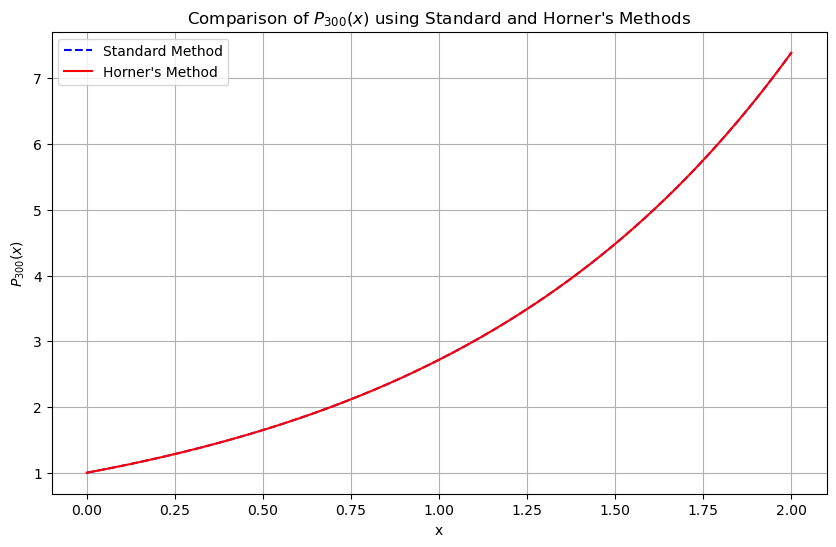

Graph Generation Time (Standard Method): 0.211944 seconds
Graph Generation Time (Horner's Method): 0.023759 seconds


In [33]:
x_values = np.linspace(0, 2, 500)

y_standard = [taylor_standard(x, n) for x in x_values]
y_horner = [taylor_horner(x, n) for x in x_values]

start_graph_standard = time.time()
y_standard = [taylor_standard(x, n) for x in x_values]
end_graph_standard = time.time()
graph_time_standard = end_graph_standard - start_graph_standard

start_graph_horner = time.time()
y_horner = [taylor_horner(x, n) for x in x_values]
end_graph_horner = time.time()
graph_time_horner = end_graph_horner - start_graph_horner

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_standard, label="Standard Method", linestyle='--', color='blue')
plt.plot(x_values, y_horner, label="Horner's Method", linestyle='-', color='red')
plt.title("Comparison of $P_{300}(x)$ using Standard and Horner's Methods")
plt.xlabel("x")
plt.ylabel("$P_{300}(x)$")
plt.legend()
plt.grid()
plt.show()

# Print graph generation times
print(f"Graph Generation Time (Standard Method): {graph_time_standard:.6f} seconds")
print(f"Graph Generation Time (Horner's Method): {graph_time_horner:.6f} seconds")
